In [1]:
import tensorflow as tf
from tensorflow import keras
import json
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
with open("C:/Users/Teja/Desktop/dsml/tensorflow_training/sarcasm.json") as f:
    datastore = json.load(f)

In [4]:
sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
    

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [7]:
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 43,009
Trainable params: 43,009
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

Epoch 1/50
625/625 [==============================] - 3s 5ms/step - loss: 0.4628 - accuracy: 0.7671 - val_loss: 0.4032 - val_accuracy: 0.8135
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3547 - accuracy: 0.8377 - val_loss: 0.3898 - val_accuracy: 0.8223
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3119 - accuracy: 0.8631 - val_loss: 0.3981 - val_accuracy: 0.8201
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.2688 - accuracy: 0.8846 - val_loss: 0.4566 - val_accuracy: 0.8037
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2279 - accuracy: 0.9038 - val_loss: 0.4630 - val_accuracy: 0.8143
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1877 - accuracy: 0.9254 - val_loss: 0.5132 - val_accuracy: 0.8147
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1505 - accuracy: 0.9410 - val_loss: 0.5654 - val_accuracy: 0.8068
Epoch 

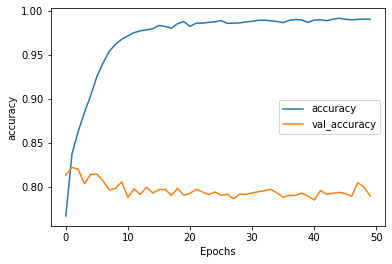

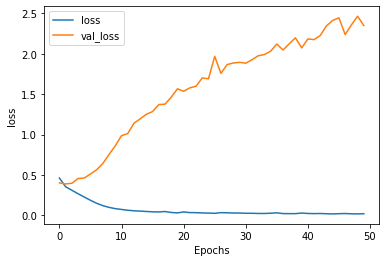

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')